<a href="https://colab.research.google.com/github/luifer991/projects/blob/main/House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.9.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sf_clean.csv')
dataset

,price,sqft,beds,bath,laundry,pets,housing_type,parking,hood_district
0,6800,1600.0,2.0,2.0,(a) in-unit,(d) no pets,(c) multi,(b) protected,7.0
1,3500,550.0,1.0,1.0,(a) in-unit,(a) both,(c) multi,(b) protected,7.0
2,5100,1300.0,2.0,1.0,(a) in-unit,(a) both,(c) multi,(d) no parking,7.0
3,9000,3500.0,3.0,2.5,(a) in-unit,(d) no pets,(c) multi,(b) protected,7.0
4,3100,561.0,1.0,1.0,(c) no laundry,(a) both,(c) multi,(d) no parking,7.0
...,...,...,...,...,...,...,...,...,...
984,3595,1200.0,2.0,1.0,(b) on-site,(c) cats,(c) multi,(d) no parking,9.0
985,4695,1700.0,3.0,2.0,(a) in-unit,(d) no pets,(c) multi,(d) no parking,7.0
986,1950,450.0,1.0,1.0,(c) no laundry,(d) no pets,(a) single,(c) off-street,3.0
987,3600,1100.0,3.0,1.0,(a) in-unit,(d) no pets,(c) multi,(d) no parking,8.0


In [ ]:
dataset.columns

Index(['price', 'sqft', 'beds', 'bath', 'laundry', 'pets', 'housing_type',
       'parking', 'hood_district'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          989 non-null    int64  
 1   sqft           989 non-null    float64
 2   beds           989 non-null    float64
 3   bath           989 non-null    float64
 4   laundry        989 non-null    object 
 5   pets           989 non-null    object 
 6   housing_type   989 non-null    object 
 7   parking        989 non-null    object 
 8   hood_district  989 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 69.7+ KB


In [ ]:
dataset.describe()

,price,sqft,beds,bath,hood_district
count,989.000000,989.000000,989.000000,989.000000,989.000000
mean,3595.035389,976.765420,1.679474,1.390293,7.052578
std,1546.222670,474.629798,1.076710,0.562714,2.404716
min,750.000000,150.000000,0.000000,1.000000,1.000000
25%,2650.000000,650.000000,1.000000,1.000000,6.000000
50%,3300.000000,900.000000,2.000000,1.000000,8.000000
75%,4242.000000,1200.000000,2.000000,2.000000,9.000000
max,19000.000000,3500.000000,6.000000,4.000000,10.000000


In [ ]:
dataset.describe(include='object')

,laundry,pets,housing_type,parking
count,989,989,989,989
unique,3,4,3,4
top,(a) in-unit,(d) no pets,(c) multi,(d) no parking
freq,488,510,937,478


In [ ]:
CATEGORICAL_COLUMNS = ['laundry', 'pets', 'housing_type', 'parking']

for column in CATEGORICAL_COLUMNS:
  dataset[column] = dataset[column].astype('category').cat.codes
  dataset[column] = dataset[column].astype('float64')

In [ ]:
dataset.head()

,price,sqft,beds,bath,laundry,pets,housing_type,parking,hood_district
0,6800,1600.0,2.0,2.0,0.0,3.0,2.0,1.0,7.0
1,3500,550.0,1.0,1.0,0.0,0.0,2.0,1.0,7.0
2,5100,1300.0,2.0,1.0,0.0,0.0,2.0,3.0,7.0
3,9000,3500.0,3.0,2.5,0.0,3.0,2.0,1.0,7.0
4,3100,561.0,1.0,1.0,2.0,0.0,2.0,3.0,7.0


In [ ]:
train_dataset, test_dataset = np.split(dataset, [int(.8 * len(dataset))])

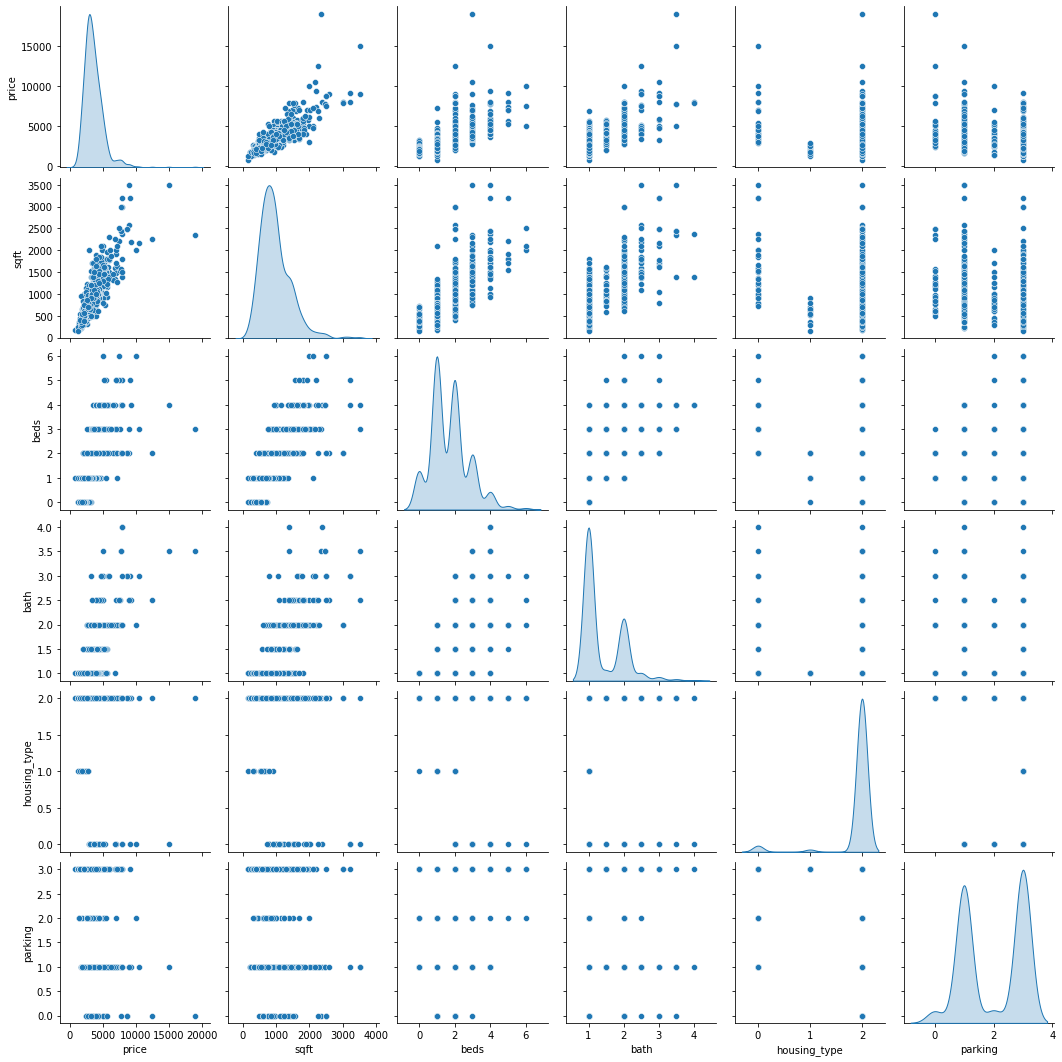

In [ ]:
sns.pairplot(train_dataset[["price", "sqft", "beds", "bath","housing_type","parking"]], diag_kind="kde")

In [ ]:
train_stats = train_dataset.describe()
train_stats.pop("price")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
sqft,791.0,971.565107,469.196766,150.0,650.0,900.0,1200.0,3500.0
beds,791.0,1.691530,1.063034,0.0,1.0,2.0,2.0,6.0
bath,791.0,1.382427,0.564863,1.0,1.0,1.0,2.0,4.0
laundry,791.0,0.630847,0.688244,0.0,0.0,1.0,1.0,2.0
pets,791.0,1.769912,1.394439,0.0,0.0,3.0,3.0,3.0
housing_type,791.0,1.910240,0.397185,0.0,2.0,2.0,2.0,2.0
parking,791.0,1.975980,1.035169,0.0,1.0,2.0,3.0,3.0
hood_district,791.0,7.083439,2.395273,1.0,6.0,8.0,9.0,10.0


In [ ]:
train_labels, test_labels = train_dataset.pop('price'), test_dataset.pop('price')

In [ ]:
#normalizer = layers.experimental.preprocessing.Normalization(axis=-1)
#normalizer.adapt(np.array(train_dataset))

In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_train_data

,sqft,beds,bath,laundry,pets,housing_type,parking,hood_district
0,1.339385,0.290179,1.093314,-0.916603,0.882139,0.22599,-0.942822,-0.034835
1,-0.898483,-0.650524,-0.677026,-0.916603,-1.269264,0.22599,-0.942822,-0.034835
2,0.699994,0.290179,-0.677026,-0.916603,-1.269264,0.22599,0.989230,-0.034835
3,5.388858,1.230882,1.978483,-0.916603,0.882139,0.22599,-0.942822,-0.034835
4,-0.875038,-0.650524,-0.677026,1.989342,-1.269264,0.22599,0.989230,-0.034835
...,...,...,...,...,...,...,...,...
786,-0.898483,-1.591228,-0.677026,0.536369,0.882139,0.22599,-0.942822,0.382654
787,0.060603,0.290179,-0.677026,-0.916603,-1.269264,0.22599,0.989230,-0.869813
788,-0.845200,-0.650524,-0.677026,0.536369,-1.269264,0.22599,0.989230,-2.122279
789,-0.578787,-0.650524,-0.677026,1.989342,-1.269264,0.22599,0.023204,-0.869813


In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 127ms/step


array([[ 0.00657099],
       [ 0.09663235],
       [ 0.01565911],
       [ 0.07655295],
       [-0.28436196],
       [ 0.00349075],
       [-0.1504012 ],
       [-0.10786219],
       [ 0.00967592],
       [-0.08428916]], dtype=float32)

In [ ]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,563256.0625,467.516602,563256.0625,562587.8750,538.272095,562587.8750,995
996,562424.7500,470.056976,562424.7500,562963.8750,538.760803,562963.8750,996
997,563904.0625,466.648682,563904.0625,563418.5625,538.829102,563418.5625,997
998,563023.8125,469.199310,563023.8125,564043.0625,538.891113,564043.0625,998
999,560885.1875,469.786346,560885.1875,564510.3750,538.813110,564510.3750,999


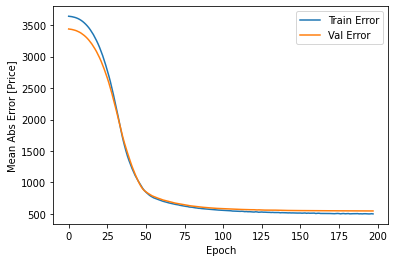

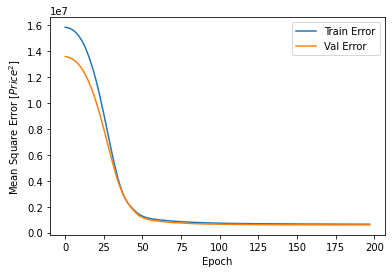

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Price]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  #plt.ylim([0,5000])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Price^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  #plt.ylim([0,50000])
  plt.legend()
  plt.show()


plot_history(history)


....................................................................................................
..................................................................................................

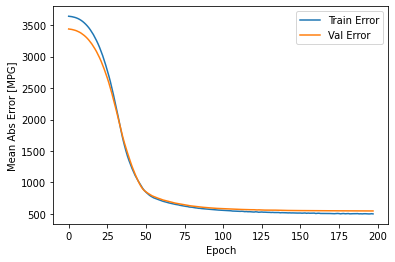

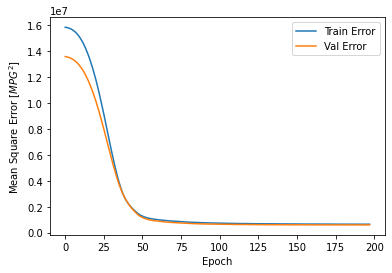

In [ ]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Price".format(mae))

7/7 - 0s - loss: 400937.5000 - mae: 465.5959 - mse: 400937.5000 - 31ms/epoch - 4ms/step
Testing set Mean Abs Error: 465.60 MPG


7/7 [==============================] - 0s 3ms/step


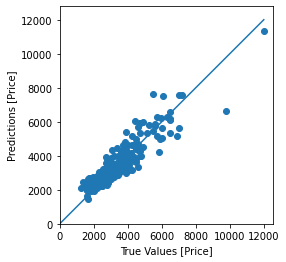

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 12000], [-100, 12000])

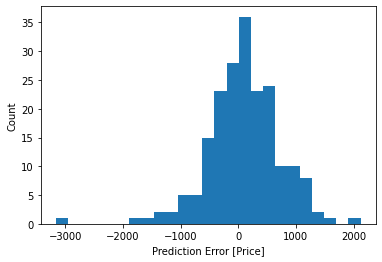

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Price]")
_ = plt.ylabel("Count")

In [ ]:
# Create model
model = keras.Sequential([
                          normalizer,
                          layers.Dense(2),
                          layers.Dense(1)
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1),
              loss='mae',
              metrics=['mae', 'mse'])

model.summary()

NameError: ignored

In [ ]:
# Train model
model.fit(train_dataset, train_labels, epochs=300, validation_split=0.2)

In [ ]:
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} price".format(mae))

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (price)')
plt.ylabel('Predictions (price)')
lims = [0, 10000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)

In [ ]:
CATEGORICAL_COLUMNS =  ['laundry', 'pets', 'housing_type', 'parking']
NUMERIC_COLUMNS = ['sqft', 'beds', 'bath','hood_district']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = train_dataset[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.int64))
print(feature_columns)

In [ ]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(train_dataset, train_labels)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(test_dataset, test_labels, num_epochs=1, shuffle=False)

In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns,n_classes=24)
# We create a linear estimator by passing the feature columns we created earlier

In [ ]:
linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data
  # clears consoke output
print(result['accuracy'])  # the result variable is simply a dict of stats about our model

In [ ]:
result = list(linear_est.predict(eval_input_fn))
print(test_dataset.loc[837799])
print(test_labels.loc[837799])
print(result[1]['probabilities'][1])

In [ ]:
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')